In [ ]:
!pip install yfinance

/tmp/ipython-input-3069499922.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start='2020-01-01')
[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2026-01-07  91308.054688  93738.789062  90601.804688  93727.468750   
2026-01-08  91027.125000  91485.851562  89233.875000  91309.640625   
2026-01-09  90513.101562  91910.671875  89625.382812  91026.273438   
2026-01-10  90386.648438  90713.031250  90283.398438  90510.101562   
2026-01-12  92032.226562  92340.867188  90706.492188  90851.898438   

Price            Volume  
Ticker          BTC-USD  
Date                     
2026-01-07  43461295053  
2026-01-08  42386697030  
2026-01-09  38305906684  
2026-01-10  12385895282  
2026-01-12  25514676224  


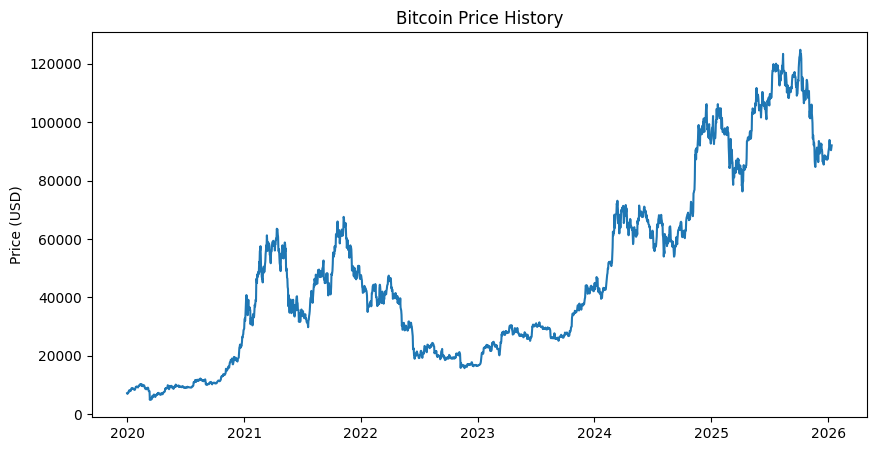

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

df = yf.download('BTC-USD', start='2020-01-01')

print(df.tail())

plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Bitcoin Price History')
plt.ylabel('Price (USD)')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 60
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - loss: 0.0487
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0031
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0025
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0025
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0028
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0020
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0025
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0022
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0022
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0019


In [ ]:
# predict price
real_data = [scaled_data[len(scaled_data) - prediction_days:len(scaled_data), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Predict Price for tomorrow : ${prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
Predict Price for tomorrow : $90119.16


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


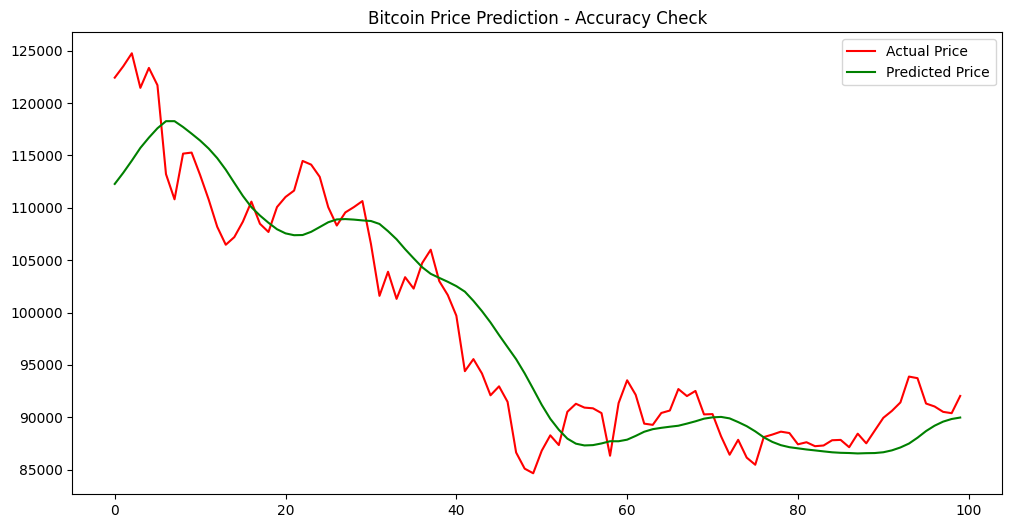

In [ ]:
# See the previous data
test_data = scaled_data[-(prediction_days + 100):] # last 100 days
x_test = []
y_actual = df['Close'].values[-100:]

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Graph
plt.figure(figsize=(12,6))
plt.plot(y_actual, color='red', label='Actual Price')
plt.plot(predicted_prices, color='green', label='Predicted Price')
plt.title('Bitcoin Price Prediction - Accuracy Check')
plt.legend()
plt.show()

In [ ]:
!pip install streamlit yfinance tensorflow sklearn localtunnel

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import yfinance as yf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

st.title("🚀 AI Crypto Price Predictor")

# User Input
ticker = st.text_input("Enter Crypto Ticker (e.g., BTC-USD, ETH-USD)", "BTC-USD")


data = yf.download(ticker, start="2020-01-01")
st.subheader(f"Recent Data for {ticker}")
st.write(data.tail())

# Graph
st.subheader("Price History")
st.line_chart(data.Close)

st.info("Note: To keep this demo simple, it shows historical data. In a full app, we would load the trained model here to show future predictions!")

Writing app.py


In [ ]:
# IP
!curl ipv4.icanhazip.com

# Streamlit app run in background.
!streamlit run app.py & npx localtunnel --port 8501

34.16.212.132
/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://true-chefs-fold.loca.lt
